In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib import cm

In [4]:
# teacher_teacher_overlaps = np.linspace(0, np.pi, 50)
dates_ = ["2020-08-10-13-55-27", "2020-08-10-13-55-29", "2020-08-10-13-55-30"]
dates_ = ["2020-08-10-14-36-01", "2020-08-10-14-36-03"]
dates = ["2020-08-17-15-08-46", "2020-08-17-15-08-47", "2020-08-17-15-08-48"] # teacher_teacher_overlaps = np.linspace(0, 1, 50); rotations = np.arccos(teacher_teacher_overlaps)
dfs = get_dfs(dates)

In [11]:
def get_dfs_from_dates(dates):
    dfs = {}
    for date in dates:
        indices = os.listdir(f"../experiments/results/{date}")
        for index in indices:
            dfs[index] = pd.read_csv(f"../experiments/results/{date}/{index}/ode_logs.csv")
    return dfs

In [34]:
def get_dfs(folder):
    dfs = {}
    indices = os.listdir(folder)
    for index in indices:
        dfs[index] = pd.read_csv(f"{folder}/{index}/ode_logs.csv")
    return dfs

In [36]:
dfs = get_dfs("../../../../Users/sebastianlee/cata_results/teacher_teacher_vs_forgetting_converged_longer/")

In [37]:
teacher_teacher_overlaps = np.linspace(0, 1, 50)
rotations = np.arccos(teacher_teacher_overlaps)

In [38]:
rotations

array([1.57079633, 1.55038675, 1.52996866, 1.50953352, 1.48907274,
       1.4685776 , 1.44803927, 1.42744876, 1.40679686, 1.38607412,
       1.36527082, 1.34437689, 1.32338188, 1.30227492, 1.28104463,
       1.25967907, 1.23816568, 1.21649116, 1.19464142, 1.17260143,
       1.15035513, 1.12788528, 1.1051733 , 1.08219905, 1.05894067,
       1.03537426, 1.01147361, 0.98720979, 0.96255075, 0.93746072,
       0.9118996 , 0.88582209, 0.85917664, 0.83190417, 0.80393635,
       0.77519337, 0.745581  , 0.71498658, 0.6832735 , 0.65027331,
       0.61577418, 0.5795034 , 0.54109953, 0.50006579, 0.45568637,
       0.40686148, 0.3517375 , 0.28669514, 0.20237569, 0.        ])

In [39]:
dfs['0'].columns

Index(['Q_00', 'Q_01', 'Q_10', 'Q_11', 'Q_00_diff', 'Q_01_diff', 'Q_10_diff',
       'Q_11_diff', 'R_00', 'R_10', 'R_00_diff', 'R_10_diff', 'U_00', 'U_10',
       'U_00_diff', 'U_10_diff', 'h1_0', 'h1_1', 'h1_0_diff', 'h1_1_diff',
       'h2_0', 'h2_1', 'h2_0_diff', 'h2_1_diff', 'error_linear_1',
       'error_linear_1_diff', 'error_linear_2', 'error_linear_2_diff',
       'error_log_1', 'error_log_2', 'task_switch_error_1_log',
       'task_switch_error_2_log'],
      dtype='object')

In [40]:
orange_color_map = cm.get_cmap('Oranges')
green_color_map = cm.get_cmap('Greens')

In [41]:
len(indices[:25])

25

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


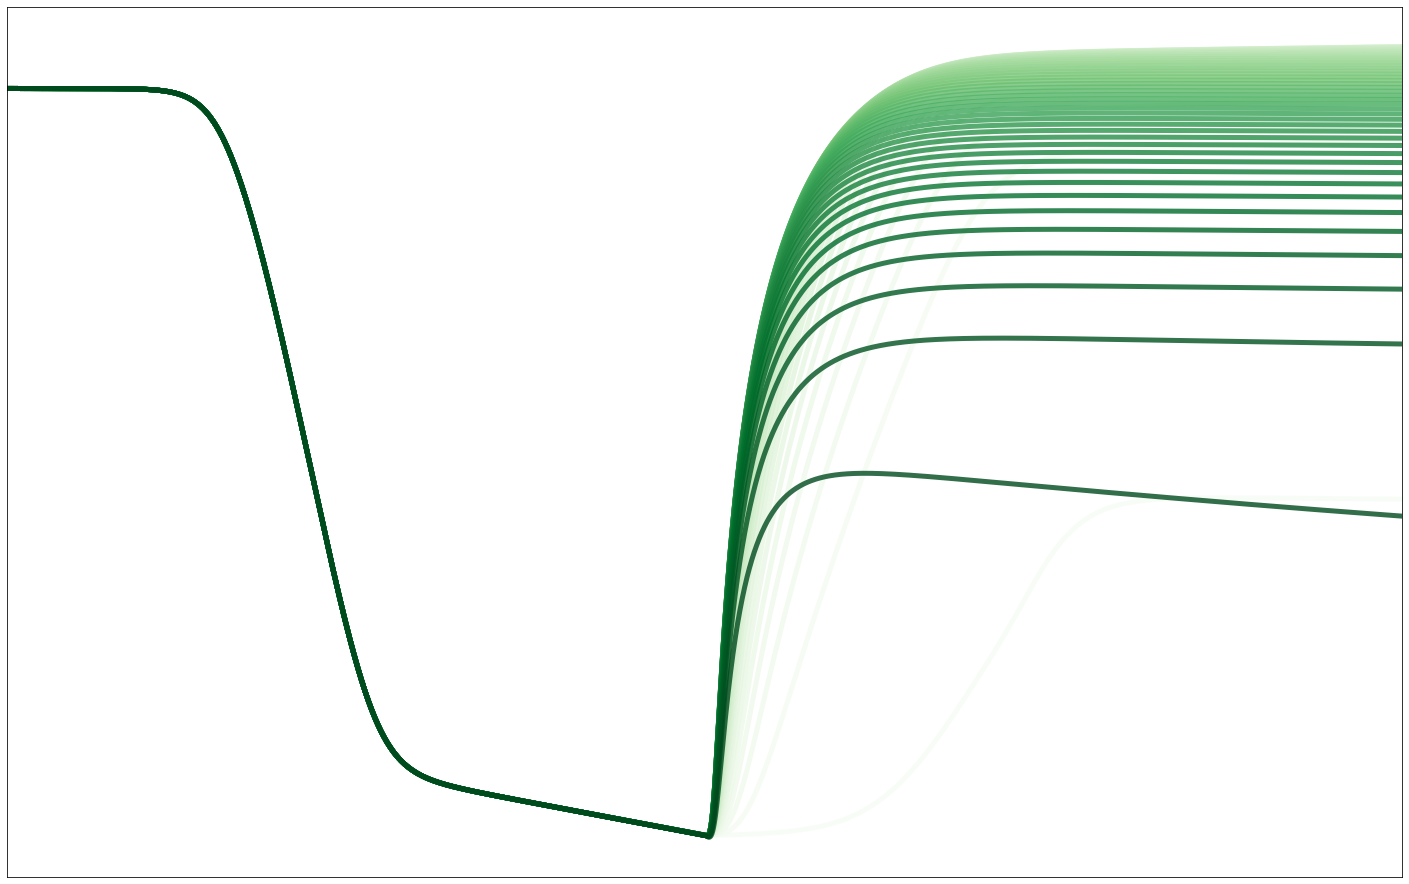

In [43]:
fig = plt.figure(figsize=(25,16))
indices = sorted(dfs.keys(), key=lambda x: int(x))
for i, index in enumerate(indices):
    dfs[index]["error_log_1"].plot(label=f"V: {round(teacher_teacher_overlaps[int(index)], 4)}", color=green_color_map(i/len(indices)), alpha=0.8, linewidth=5)
# plt.xlabel("Time Step")
# plt.ylabel("Teacher 1 Error")
# plt.legend()
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
plt.xlim((0, 90000))
# plt.ylim((-5, -0.5))
fig.show()
fig.savefig("t1_error.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [171]:
def plot_legend():
    fig = plt.figure(figsize=(2,16))
    for i, index in enumerate(indices):
        if i < 25:
            plt.plot([0, 1], [i, i], color=green_color_map(i/len(indices)), linewidth=5)
        else:
            plt.plot([4, 5], [i - 25, i - 25], color=green_color_map(i/len(indices)), linewidth=5)
    plt.tick_params(
        axis='both',         # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False, # labels along the bottom edge are off
        left=False,
        labelleft=False
    )
    plt.xlim((-1, 8))
    plt.ylim((-1, 25))
    fig.show()
    fig.savefig("legend.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


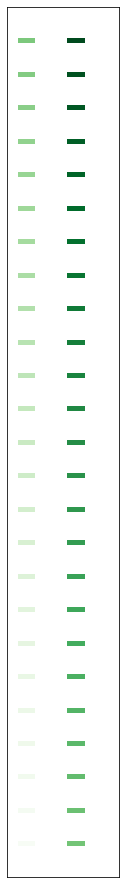

In [172]:
plot_legend()

In [23]:
teacher_teacher_overlaps

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


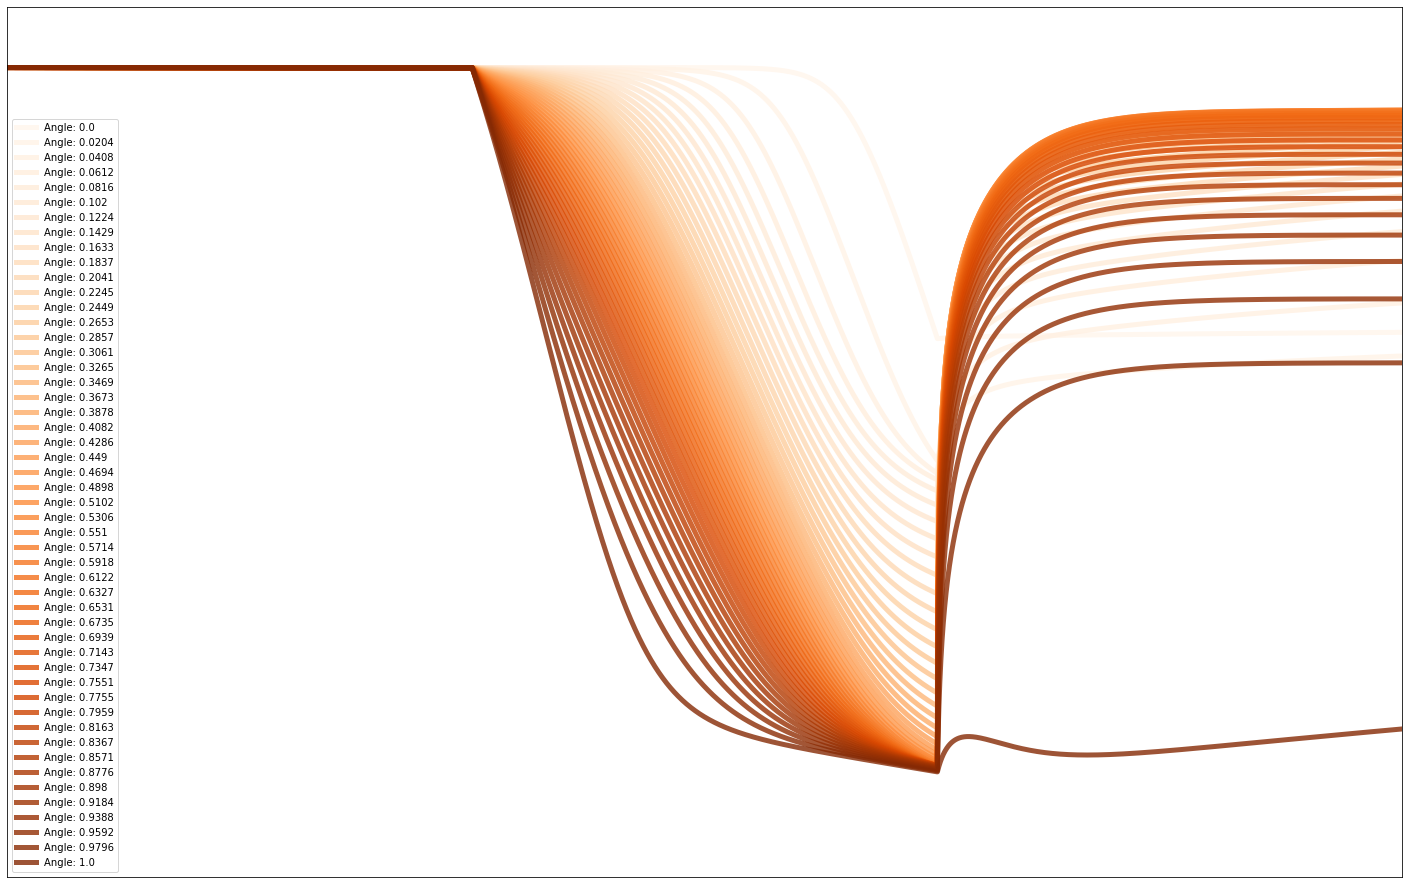

In [200]:
fig = plt.figure(figsize=(25,16))
indices = sorted(dfs.keys(), key=lambda x: int(x))
for i, index in enumerate(indices):
    dfs[index]["error_log_2"].plot(label=f"Angle: {round(teacher_teacher_overlaps[int(index)], 4)}", color=orange_color_map(i/len(indices)), alpha=0.8, linewidth=5)
plt.legend()
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
plt.xlim((0, 7500))
plt.ylim((-4.5, -0.5))
fig.show()
fig.savefig("error_dagger.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [29]:
dfs['0'].columns

Index(['Q_00', 'Q_01', 'Q_10', 'Q_11', 'Q_00_diff', 'Q_01_diff', 'Q_10_diff',
       'Q_11_diff', 'R_00', 'R_10', 'R_00_diff', 'R_10_diff', 'U_00', 'U_10',
       'U_00_diff', 'U_10_diff', 'h1_0', 'h1_1', 'h1_0_diff', 'h1_1_diff',
       'h2_0', 'h2_1', 'h2_0_diff', 'h2_1_diff', 'error_linear_1',
       'error_linear_1_diff', 'error_linear_2', 'error_linear_2_diff',
       'error_log_1', 'error_log_2', 'task_switch_error_1_log',
       'task_switch_error_2_log'],
      dtype='object')

In [71]:
task_switch_errors_1 = [np.array(dfs[str(i)].task_switch_error_1_log.dropna())[0] for i in range(len(teacher_teacher_overlaps))]
task_switch_errors_2 = [np.array(dfs[str(i)].task_switch_error_2_log.dropna())[0] for i in range(len(teacher_teacher_overlaps))]

delta_task_switch_errors_1 = [np.array(dfs[str(i)].error_log_1.dropna())[-10000] - task_switch_errors_1[i] for i in range(len(teacher_teacher_overlaps))]
# delta_task_switch_errors_2 = [np.array(dfs[str(i)].task_switch_error_2_log.dropna())[1] - np.array(dfs[str(i)].task_switch_error_2_log.dropna())[0] for i in range(len(teacher_teacher_overlaps))]

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


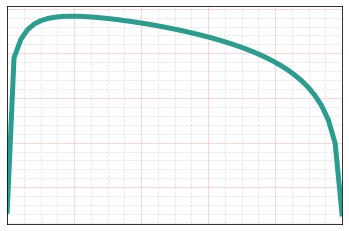

In [72]:
fig = plt.figure()
plt.plot(teacher_teacher_overlaps, delta_task_switch_errors_1, linewidth=5, color="#2A9D8F")
# plt.xlabel("Teacher-Teacher overlap")
# plt.ylabel("Teacher 1 error delta at end of first switch (log)")
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
plt.xlim((0, 1))
# plt.ylim((0, 0.28))
plt.minorticks_on()
plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
fig.show()
fig.savefig("delta_error_1.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

In [67]:
fig = plt.figure()
plt.plot(teacher_teacher_overlaps, -np.array(delta_task_switch_errors_2), linewidth=5, color="#E9C46A")
# plt.xlabel("'Angle' between teachers in radians")
# plt.ylabel("Teacher 2 error at end of first switch (log)")
plt.tick_params(
            axis='both',         # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False, # labels along the bottom edge are off
            left=False,
            labelleft=False
        ) 
plt.xlim((0, 1))
plt.ylim((0.156, 0.167))
plt.minorticks_on()
plt.grid(b=True, which='major', color='r', linestyle='-', alpha=0.2)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.2)
fig.show()
fig.savefig("delta_error_2.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

NameError: name 'delta_task_switch_errors_2' is not defined

<Figure size 432x288 with 0 Axes>

Forgetting: There is a middle ground that is the worst for forgetting. Either orthogonal or aligned teachers are best.

Transfer: However, for transfer there is no inversion. The more alignment, the more transfer - it is a monotonic function.

In [249]:
forgetting_rate_1 = [np.array(dfs[str(i)].iloc[5000].error_linear_1_diff) for i in range(len(teacher_teacher_overlaps))]
forgetting_rate_2 = [np.array(dfs[str(i)].iloc[5010].error_linear_2_diff) for i in range(len(teacher_teacher_overlaps))]

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


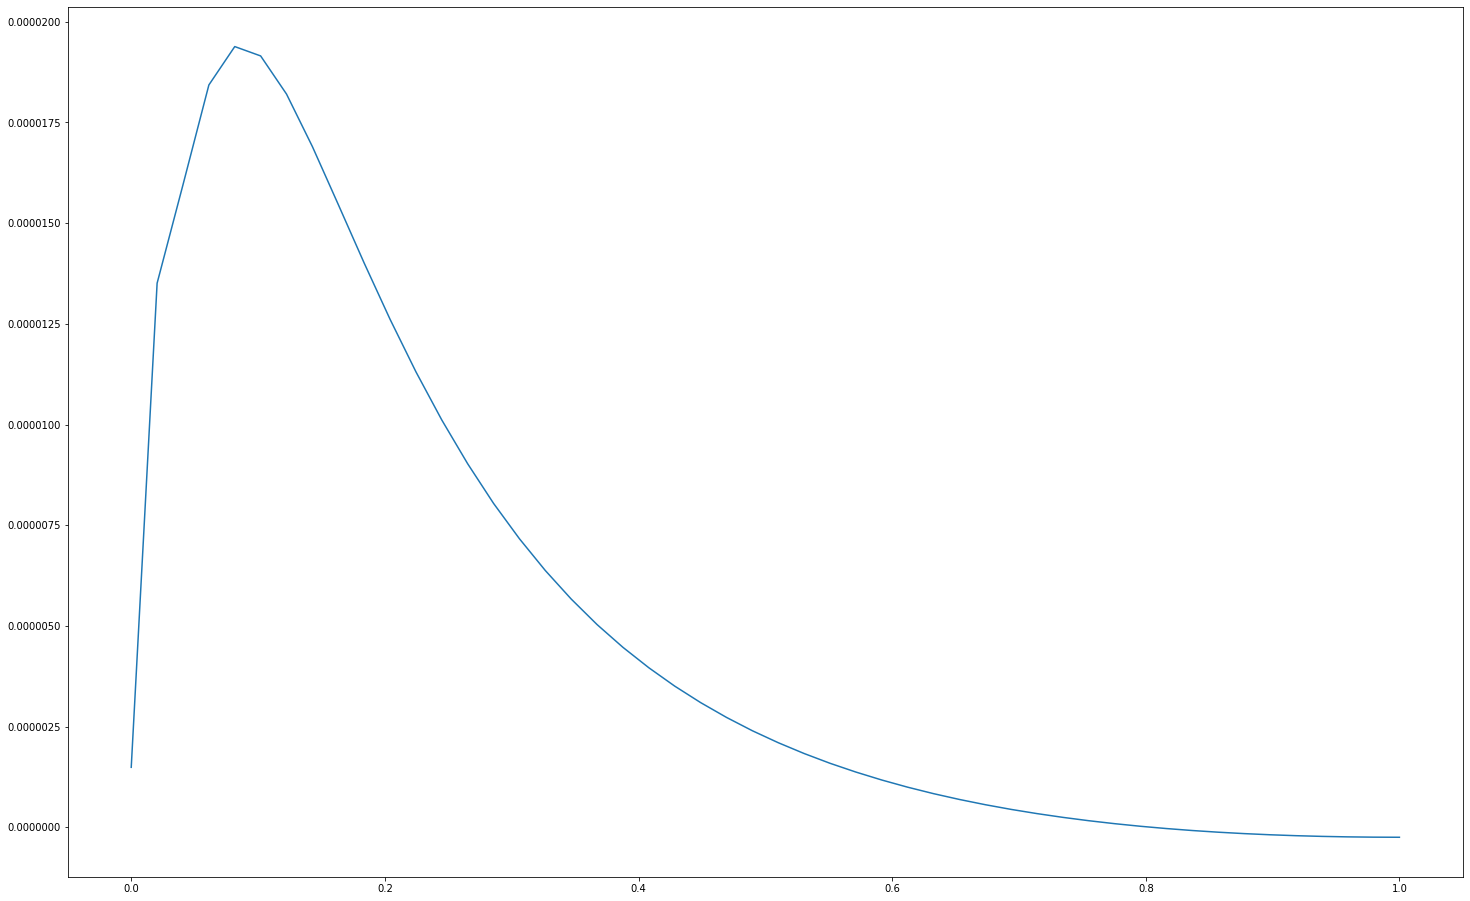

In [250]:
fig = plt.figure(figsize=(25,16))
plt.plot(teacher_teacher_overlaps, forgetting_rate_1)
fig.show()

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


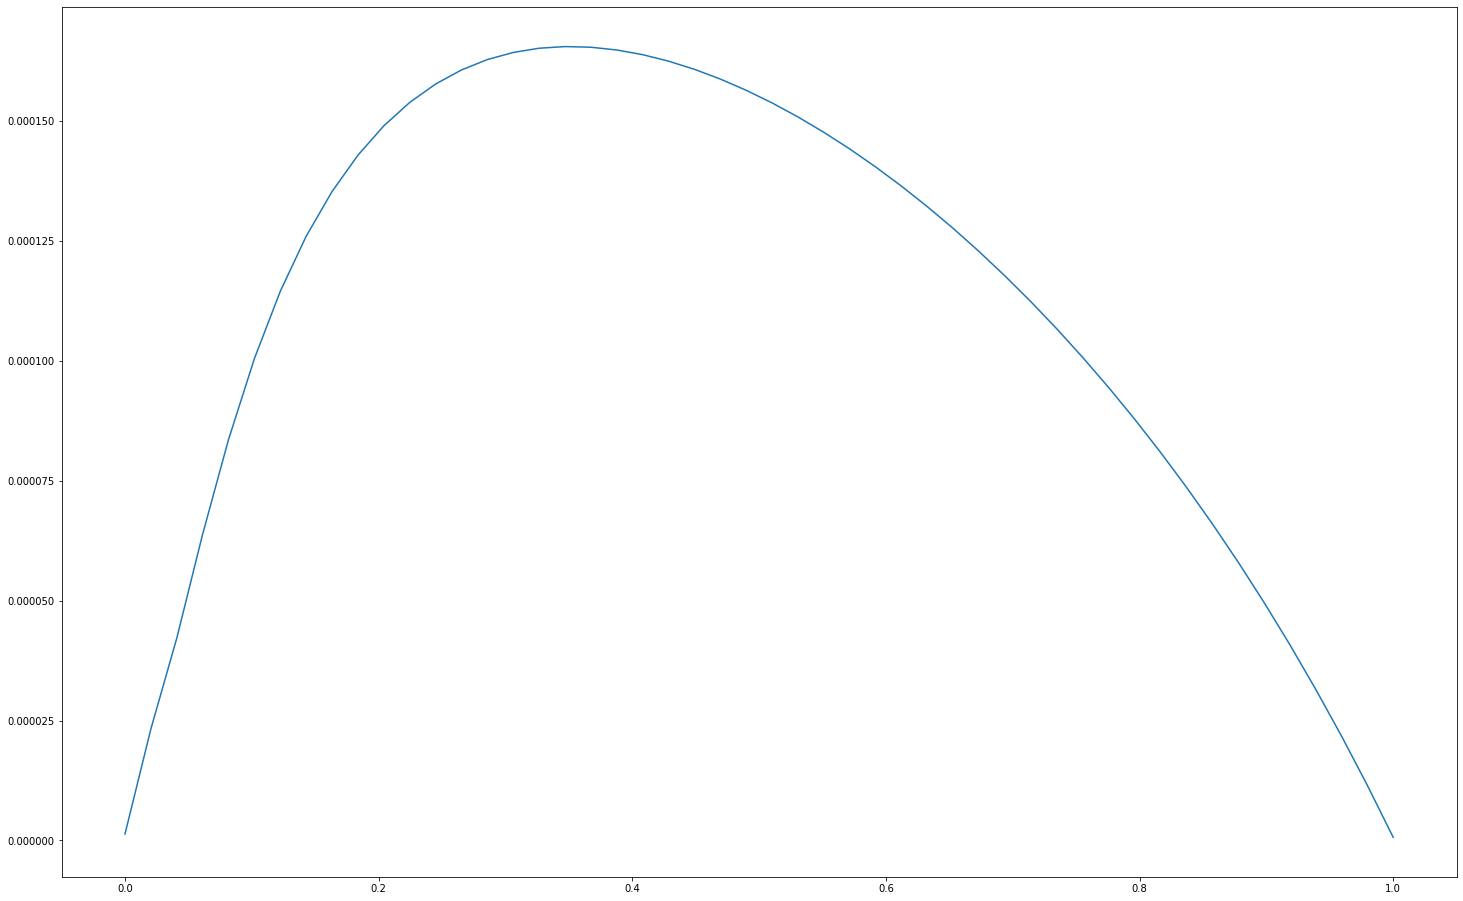

In [228]:
fig = plt.figure(figsize=(25,16))
plt.plot(teacher_teacher_overlaps, forgetting_rate_2)
fig.show()

In [182]:
u_log_00 = [np.array(dfs[str(i)].U_00.dropna())[-1] for i in range(len(teacher_teacher_overlaps))]
u_log_10 = [np.array(dfs[str(i)].U_10.dropna()) for i in range(len(teacher_teacher_overlaps))]

/Users/sebastianlee/Envs/cata/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


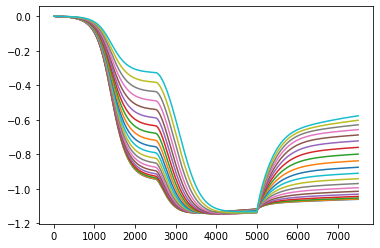

In [181]:
fig = plt.figure()
for u_log in u_log_00[:20]:
    plt.plot(range(len(u_log)), u_log)
    
fig.show()

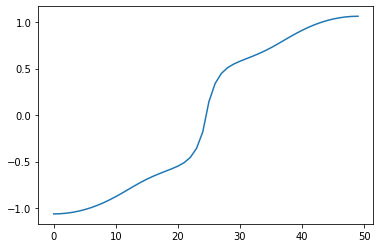

In [186]:
plt.plot(range(len(u_log_00)), u_log_00)